## Assignment 8

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

The student with the highest study time is Edgar with 20 hours.


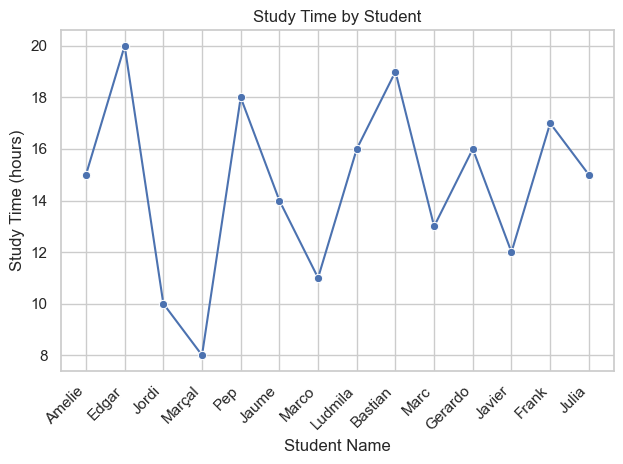

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)

# Create the line plot using seaborn
sns.set_theme(style="whitegrid") 
plot = sns.lineplot(data=df, x="Student Name", y="Study Time", marker='o')

plot.set(
    title="Study Time by Student",
    xlabel="Student Name",
    ylabel="Study Time (hours)"
)

plot.set_xticks(range(len(df["Student Name"])))
plot.set_xticklabels(df["Student Name"], rotation=45, ha="right")

plot.figure.tight_layout()

# Student with the highest study time
top_student = df.loc[df["Study Time"].idxmax()]
print(f"The student with the highest study time is {top_student['Student Name']} with {top_student['Study Time']} hours.")



2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

The grade range(s) with the highest frequency (4 students) is/are:
Grade Range: 86.2 - 90.6
Grade Range: 90.6 - 95.0


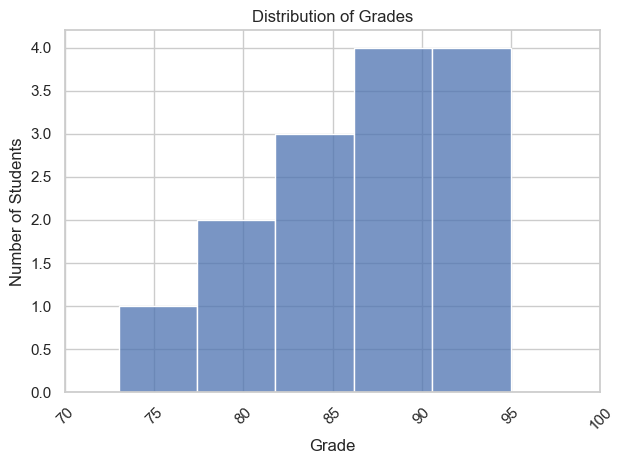

In [ ]:
sns.set_theme(style="whitegrid")
hist = sns.histplot(data=df, x='Grade', bins=5, kde=False)


hist.set(
    title="Distribution of Grades",
    xlabel="Grade",
    ylabel="Number of Students"
)

# Rotate x-axis labels if needed
hist.set_xticks(hist.get_xticks())
hist.set_xticklabels(hist.get_xticklabels(), rotation=45)

hist.figure.tight_layout()

counts, bin_edges = np.histogram(df['Grade'], bins=5)

max_count = counts.max()
max_bins = np.where(counts == max_count)[0]

# Print the grades with the highest frequency
print(f"The grade range(s) with the highest frequency ({max_count} students) is/are:")
for index in max_bins:
    lower_edge = bin_edges[index]
    upper_edge = bin_edges[index + 1]
    print(f"Grade Range: {lower_edge:.1f} - {upper_edge:.1f}")

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

The percentage of students scoring less than 85 is 28.57%.


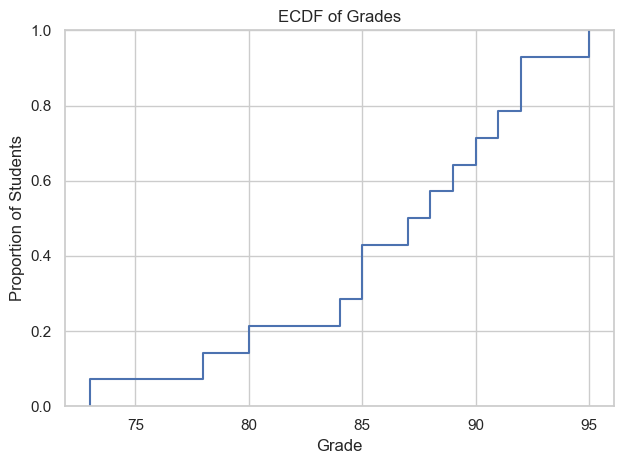

In [ ]:
sns.set_theme(style="whitegrid")
ecdf = sns.ecdfplot(data=df, x="Grade")

ecdf.set(
    title="ECDF of Grades",
    xlabel="Grade",
    ylabel="Proportion of Students"
)

ecdf.figure.tight_layout()

# Calculate the percentage of students scoring less than 85
below_85 = (df['Grade'] < 85).sum()
percentage_below_85 = (below_85 / len(df)) * 100
print(f"The percentage of students scoring less than 85 is {percentage_below_85:.2f}%.")

4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?

The course with the most spread in grades is 'Cloud Computing' with a spread of 12 points.


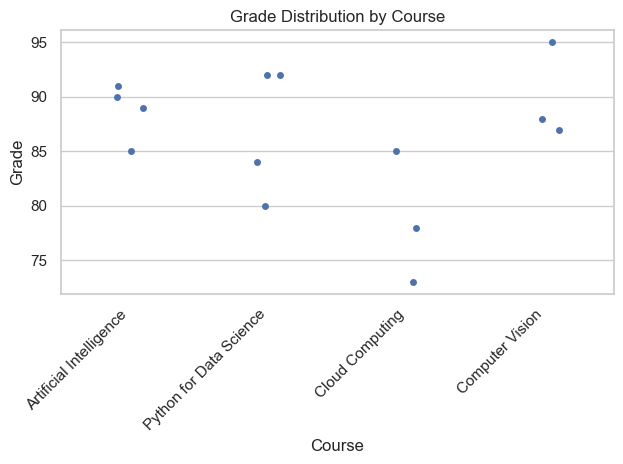

In [ ]:
sns.set_theme(style="whitegrid")
strip = sns.stripplot(data=df, x="Course", y="Grade", jitter=True)

strip.set(
    title="Grade Distribution by Course",
    xlabel="Course",
    ylabel="Grade"
)

strip.set_xticks(range(len(df["Course"].unique())))
strip.set_xticklabels(df["Course"].unique(), rotation=45, ha="right")

strip.figure.tight_layout()

# Determine the course with the most spread in grades
grade_spread = df.groupby("Course")["Grade"].apply(lambda x: x.max() - x.min())
most_spread_course = grade_spread.idxmax()
most_spread_value = grade_spread.max()

print(f"The course with the most spread in grades is '{most_spread_course}' with a spread of {most_spread_value} points.")

5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

The gender with the higher average study time is Female with an average of 15.33 hours.


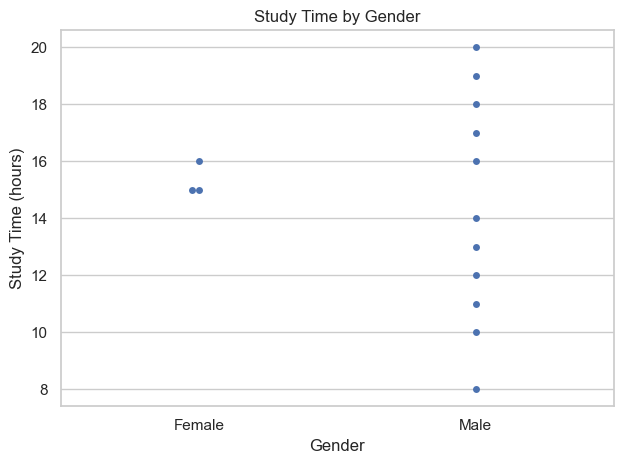

In [ ]:
sns.set_theme(style="whitegrid")
swarm = sns.swarmplot(data=df, x="Gender", y="Study Time")

swarm.set(
    title="Study Time by Gender",
    xlabel="Gender",
    ylabel="Study Time (hours)"
)

swarm.figure.tight_layout()

# Calculate the average study time by gender
average_study_time = df.groupby("Gender")["Study Time"].mean()
higher_avg_gender = average_study_time.idxmax()
higher_avg_time = average_study_time.max()

print(f"The gender with the higher average study time is {higher_avg_gender} with an average of {higher_avg_time:.2f} hours.")

6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

C:\Users\nelso\AppData\Local\Temp\ipykernel_19952\3654117999.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  point.set_xticklabels(point.get_xticklabels(), rotation=45, ha="right")


The course with the highest average grade is 'Computer Vision' with an average grade of 90.00.


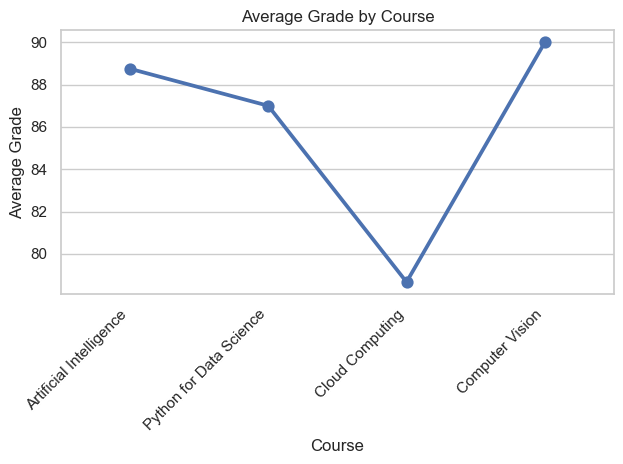

In [ ]:
sns.set_theme(style="whitegrid")
point = sns.pointplot(data=df, x="Course", y="Grade", estimator='mean', errorbar=None)

point.set(
    title="Average Grade by Course",
    xlabel="Course",
    ylabel="Average Grade"
)

point.set_xticklabels(point.get_xticklabels(), rotation=45, ha="right")

point.figure.tight_layout()

# Determine the course with the highest average grade
average_grade = df.groupby("Course")["Grade"].mean()
highest_avg_course = average_grade.idxmax()
highest_avg_grade = average_grade.max()

print(f"The course with the highest average grade is '{highest_avg_course}' with an average grade of {highest_avg_grade:.2f}.")

The course with the highest average grade is 'Computer Vision' with an average grade of 90.00.


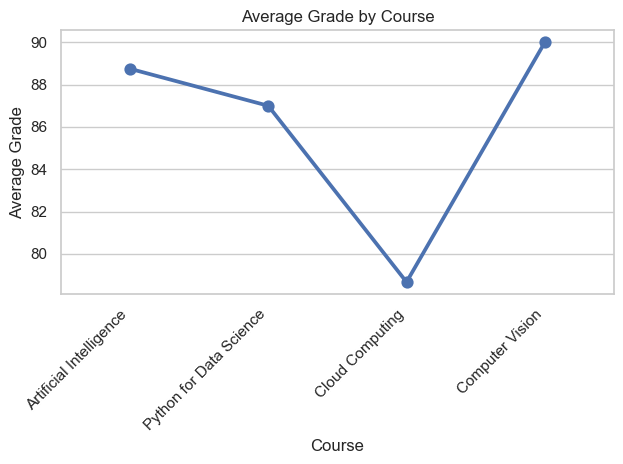

In [ ]:
sns.set_theme(style="whitegrid")
point = sns.pointplot(data=df, x="Course", y="Grade", estimator='mean', errorbar=None)

point.set(
    title="Average Grade by Course",
    xlabel="Course",
    ylabel="Average Grade"
)

point.set_xticks(range(len(df["Course"].unique())))
point.set_xticklabels(df["Course"].unique(), rotation=45, ha="right")

point.figure.tight_layout()

# Determine the course with the highest average grade
average_grade = df.groupby("Course")["Grade"].mean()
highest_avg_course = average_grade.idxmax()
highest_avg_grade = average_grade.max()

print(f"The course with the highest average grade is '{highest_avg_course}' with an average grade of {highest_avg_grade:.2f}.")